# Dataset Generator
This notebook is just to keep track of the example 3D dataset generation. It is saved in order to be able to modify the dataset easily.

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Generate basic random data
num_data_points = 50
random_numbers = np.random.randn(num_data_points, 3)
df = pd.DataFrame(random_numbers)

# Define mean and variance for each dimension
df[0] *= 3
df[1] *= 2
df[2] *= 0.6

df[0] += 4
df[1] += 5
df[2] += 2
df.head(5)

,0,1,2
0,10.600176,4.414488,2.453534
1,4.221167,8.707593,2.872345
2,2.342109,5.789153,2.611854
3,0.476980,7.135694,1.313063
4,9.249726,5.890862,0.959503


In [3]:
import matplotlib.pyplot as plt

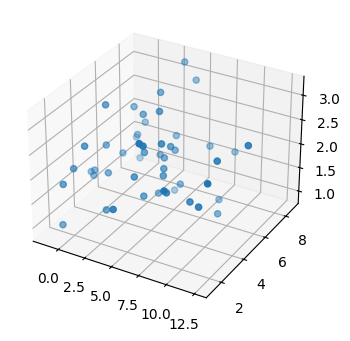

In [4]:
plt.figure(figsize = (5, 4))
plot_axes = plt.axes(projection = '3d')
plot_axes.scatter3D(df[0], df[1], df[2])

In [80]:
def generate_random_points(num_points: int, mean_shift: float = 3.0, covariance_factor1: float = 0.65, covariance_factor2: float = 0.1) -> np.ndarray:
    """
    Generate random 3D points with specific characteristics.
    
    Parameters:
    - num_points (int): Number of data points to generate.
    - mean_shift (float): Shift the mean towards the positive area.
    - covariance_factor (float): Factor to control the covariance between the first and second dimensions.
    
    Returns:
    - np.ndarray: Array of shape (num_points, 3) containing the generated 3D points.
    """
    
    # Generate points with slight touch of normal distribution
    points = np.random.randn(num_points, 3)
    
    # Shift the mean towards the positive area
    points += mean_shift
    
    # Add slight uniform noise
    # noise = np.random.uniform(-0.5, 0.5, size=(num_points, 3))
    # points += noise
    
    # Apply covariance between the first and second dimensions
    cov_matrix = np.array([
        [1, covariance_factor1, 0.0],
        [covariance_factor1, .7, covariance_factor2],
        [0.0, covariance_factor2, 0.1]  # Third dimension has little spread
    ])
    
    # Apply the covariance matrix to the points
    points = np.dot(points, np.linalg.cholesky(cov_matrix).T)
    
    return points

In [88]:
covariance_factor1 = .65
covariance_factor2 = .1
cov_matrix = np.array([
        [1, covariance_factor1, .1],
        [covariance_factor1, .8, covariance_factor2],
        [.1, covariance_factor2, .4]  # Third dimension has little spread
    ])

eig_values, eig_vectors = np.linalg.eig(cov_matrix)
eig_values

array([1.57457699, 0.2415415 , 0.38388151])

In [83]:
points = generate_random_points(num_points=20) # 10 for debugging to limit the rendering time. 100 for the final video.

## Visualize the data

In [76]:
import plotly.graph_objects as go

In [89]:
fig = go.Figure(data=[go.Scatter3d(
    x=points[:, 0],
    y=points[:, 1],
    z=points[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=points[:, 2],                # Set color to the third dimension
        colorscale='Viridis',             # Choose a colorscale
        opacity=0.8
    )
)])

# Update layout for better visibility
fig.update_layout(
    title='Interactive 3D Scatter Plot',
    scene=dict(
        xaxis_title='X-axis',
        yaxis_title='Y-axis',
        zaxis_title='Z-axis'
    )
)

# Show the plot
fig.show()

In [90]:
# Export
df = pd.DataFrame(points)
df.to_csv("src/assets/data_points.csv", index=False, header=False)